### First of all, we are going to import the libraries we need to get a clean and useful dataset

In [1]:
import pandas as pd
import numpy as np
import datetime
from src.cleaning_functions import *
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

### Our datasets to DataFrames

In [2]:
df_eur_usd = pd.read_csv('./Input/EURUSD-2000-2020-15m.csv')
df_eur_jpy = pd.read_csv('./Input/EURJPY-2000-2020-15m.csv')
df_usd_jpy = pd.read_csv('./Input/USDJPY-2000-2020-15m.csv')
df_eur_chf = pd.read_csv('./Input/EURCHF-2000-2020-15m.csv')
df_usd_cad = pd.read_csv('./Input/USDCAD-2000-2020-15m.csv')
df_usd_chf = pd.read_csv('./Input/USDCHF-2000-2020-15m.csv')
df_aud_usd = pd.read_csv('./Input/AUDUSD-2000-2020-15m.csv')

### This is the information that we are going to manipulate and their types and form

In [3]:
print(df_eur_usd.dtypes)
df_eur_usd.columns

DATE_TIME     object
HIGH         float64
LOW          float64
OPEN         float64
CLOSE        float64
dtype: object


Index(['DATE_TIME', 'HIGH', 'LOW', 'OPEN', 'CLOSE'], dtype='object')

In [4]:
df_eur_usd.head()

,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,2000.01.03 00:00:00,1.0080,1.0073,1.0073,1.0077
1,2000.01.03 00:15:00,1.0087,1.0076,1.0078,1.0086
2,2000.01.03 00:30:00,1.0089,1.0079,1.0087,1.0079
3,2000.01.03 00:45:00,1.0132,1.0078,1.0078,1.0128
4,2000.01.03 01:00:00,1.0133,1.0120,1.0129,1.0122


### Now we apply this function to get the dataframes that we want (time indexed & only 2019)

In [5]:
eur_usd = red_and_ind(df_eur_usd)
eur_jpy = red_and_ind(df_eur_jpy)
usd_jpy = red_and_ind(df_usd_jpy)
eur_chf = red_and_ind(df_eur_chf)
usd_cad = red_and_ind(df_usd_cad)
usd_chf = red_and_ind(df_usd_chf)
aud_usd = red_and_ind(df_aud_usd)

In [6]:
print(eur_usd.shape, eur_jpy.shape, usd_jpy.shape, eur_chf.shape, usd_cad.shape, usd_chf.shape, aud_usd.shape)

(24776, 5) (24776, 5) (24776, 5) (24776, 5) (24776, 5) (24776, 5) (24776, 5)


In [7]:
eur_usd.head()

,HIGH,LOW,OPEN,CLOSE,DIFF
DATE_TIME,,,,,
2019-01-02 06:00:00,1.14462,1.14437,1.14457,1.14443,-0.00014
2019-01-02 06:15:00,1.14464,1.14437,1.14443,1.14445,0.00002
2019-01-02 06:30:00,1.14468,1.14426,1.14443,1.14460,0.00017
2019-01-02 06:45:00,1.14458,1.14443,1.14458,1.14449,-0.00009
2019-01-02 07:00:00,1.14483,1.14449,1.14449,1.14480,0.00031


In [8]:
eur_usd = renaming(eur_usd,'EUR-USD')
eur_jpy = renaming(eur_jpy,'EUR-JPY')
usd_jpy = renaming(usd_jpy,'USD-JPY')
eur_chf = renaming(eur_chf,'EUR-CHF')
usd_cad = renaming(usd_cad,'USD-CAD')
usd_chf = renaming(usd_chf,'USD-CHF')
aud_usd = renaming(aud_usd,'AUD-USD')

In [9]:
eur_usd.to_csv('./Output/eur_usd.csv')
eur_usd

,HIGH_EUR-USD,LOW_EUR-USD,OPEN_EUR-USD,CLOSE_EUR-USD,DIFF_EUR-USD
DATE_TIME,,,,,
2019-01-02 06:00:00,1.14462,1.14437,1.14457,1.14443,-0.00014
2019-01-02 06:15:00,1.14464,1.14437,1.14443,1.14445,0.00002
2019-01-02 06:30:00,1.14468,1.14426,1.14443,1.14460,0.00017
2019-01-02 06:45:00,1.14458,1.14443,1.14458,1.14449,-0.00009
2019-01-02 07:00:00,1.14483,1.14449,1.14449,1.14480,0.00031
...,...,...,...,...,...
2019-12-31 19:45:00,1.12291,1.12231,1.12253,1.12288,0.00035
2019-12-31 20:00:00,1.12287,1.12244,1.12286,1.12247,-0.00039
2019-12-31 20:15:00,1.12249,1.12235,1.12247,1.12242,-0.00005


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb156df2970>,
      dtype=object)

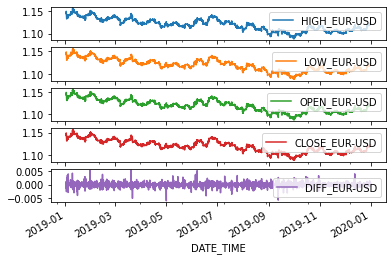

In [10]:
eur_usd.plot(subplots=True)

In [11]:
forex_pairs = pd.concat([eur_usd, eur_jpy, usd_jpy, eur_chf, usd_cad, usd_chf, aud_usd], axis=1, join='inner')

In [12]:
forex_pairs

,HIGH_EUR-USD,LOW_EUR-USD,OPEN_EUR-USD,CLOSE_EUR-USD,DIFF_EUR-USD,HIGH_EUR-JPY,LOW_EUR-JPY,OPEN_EUR-JPY,CLOSE_EUR-JPY,DIFF_EUR-JPY,...,HIGH_USD-CHF,LOW_USD-CHF,OPEN_USD-CHF,CLOSE_USD-CHF,DIFF_USD-CHF,HIGH_AUD-USD,LOW_AUD-USD,OPEN_AUD-USD,CLOSE_AUD-USD,DIFF_AUD-USD
DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-02 06:00:00,1.14462,1.14437,1.14457,1.14443,-0.00014,125.270,125.183,125.264,125.183,-0.081,...,0.98374,0.98349,0.98359,0.98357,-0.00002,0.70115,0.70035,0.70106,0.70076,-0.00030
2019-01-02 06:15:00,1.14464,1.14437,1.14443,1.14445,0.00002,125.210,125.167,125.184,125.177,-0.007,...,0.98359,0.98350,0.98357,0.98357,0.00000,0.70200,0.70077,0.70077,0.70199,0.00122
2019-01-02 06:30:00,1.14468,1.14426,1.14443,1.14460,0.00017,125.231,125.165,125.176,125.206,0.030,...,0.98373,0.98339,0.98357,0.98342,-0.00015,0.70206,0.70159,0.70199,0.70182,-0.00017
2019-01-02 06:45:00,1.14458,1.14443,1.14458,1.14449,-0.00009,125.230,125.196,125.206,125.224,0.018,...,0.98360,0.98341,0.98342,0.98356,0.00014,0.70194,0.70163,0.70182,0.70189,0.00007
2019-01-02 07:00:00,1.14483,1.14449,1.14449,1.14480,0.00031,125.274,125.217,125.223,125.270,0.047,...,0.98359,0.98337,0.98355,0.98338,-0.00017,0.70202,0.70175,0.70187,0.70193,0.00006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:45:00,1.12291,1.12231,1.12253,1.12288,0.00035,121.962,121.938,121.942,121.954,0.012,...,0.96721,0.96635,0.96721,0.96639,-0.00082,0.70284,0.70235,0.70279,0.70238,-0.00041
2019-12-31 20:00:00,1.12287,1.12244,1.12286,1.12247,-0.00039,121.964,121.943,121.954,121.943,-0.011,...,0.96680,0.96635,0.96635,0.96661,0.00026,0.70247,0.70228,0.70238,0.70230,-0.00008
2019-12-31 20:15:00,1.12249,1.12235,1.12247,1.12242,-0.00005,121.965,121.932,121.945,121.953,0.008,...,0.96712,0.96661,0.96661,0.96702,0.00041,0.70230,0.70201,0.70229,0.70219,-0.00010


In [13]:
forex_pairs.to_csv('./Output/forex_pairs.csv')

In [14]:
forex_pairs.describe()

,HIGH_EUR-USD,LOW_EUR-USD,OPEN_EUR-USD,CLOSE_EUR-USD,DIFF_EUR-USD,HIGH_EUR-JPY,LOW_EUR-JPY,OPEN_EUR-JPY,CLOSE_EUR-JPY,DIFF_EUR-JPY,...,HIGH_USD-CHF,LOW_USD-CHF,OPEN_USD-CHF,CLOSE_USD-CHF,DIFF_USD-CHF,HIGH_AUD-USD,LOW_AUD-USD,OPEN_AUD-USD,CLOSE_AUD-USD,DIFF_AUD-USD
count,24776.000000,24776.000000,24776.000000,24776.000000,2.477600e+04,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,...,24776.000000,24776.000000,24776.000000,24776.000000,2.477600e+04,24776.000000,24776.000000,24776.000000,24776.000000,2.477600e+04
mean,1.119762,1.119277,1.119523,1.119522,-4.415563e-07,122.084231,122.015334,122.050245,122.050260,0.000015,...,0.994089,0.993617,0.993853,0.993853,-8.556668e-08,0.695416,0.694996,0.695206,0.695206,2.760736e-07
std,0.013511,0.013466,0.013489,0.013489,3.759438e-04,2.713318,2.713370,2.713485,2.713309,0.053612,...,0.010922,0.010967,0.010944,0.010946,3.655248e-04,0.014380,0.014347,0.014364,0.014364,3.315289e-04
min,1.088400,1.087880,1.088020,1.088020,-5.950000e-03,115.989000,115.860000,115.936000,115.937000,-2.787000,...,0.964990,0.964600,0.964790,0.964790,-5.690000e-03,0.667730,0.667050,0.667240,0.667240,-1.427000e-02
25%,1.108690,1.108250,1.108470,1.108480,-1.600000e-04,120.242000,120.193000,120.219750,120.220000,-0.023000,...,0.986930,0.986430,0.986670,0.986670,-1.600000e-04,0.683167,0.682800,0.682980,0.682978,-1.500000e-04
50%,1.120045,1.119490,1.119760,1.119760,0.000000e+00,121.875000,121.810000,121.844000,121.844500,0.001000,...,0.993400,0.992950,0.993170,0.993170,0.000000e+00,0.693635,0.693180,0.693410,0.693410,0.000000e+00
75%,1.129940,1.129420,1.129700,1.129700,1.600000e-04,124.657000,124.578250,124.619000,124.619000,0.023000,...,1.000220,0.999850,1.000030,1.000030,1.600000e-04,0.708640,0.708190,0.708392,0.708390,1.500000e-04
max,1.156970,1.156440,1.156910,1.156910,5.320000e-03,127.498000,127.359000,127.477000,127.467000,0.918000,...,1.023770,1.022410,1.022950,1.022940,7.830000e-03,0.729490,0.728650,0.729000,0.729010,5.480000e-03


### Here is the correlation between them

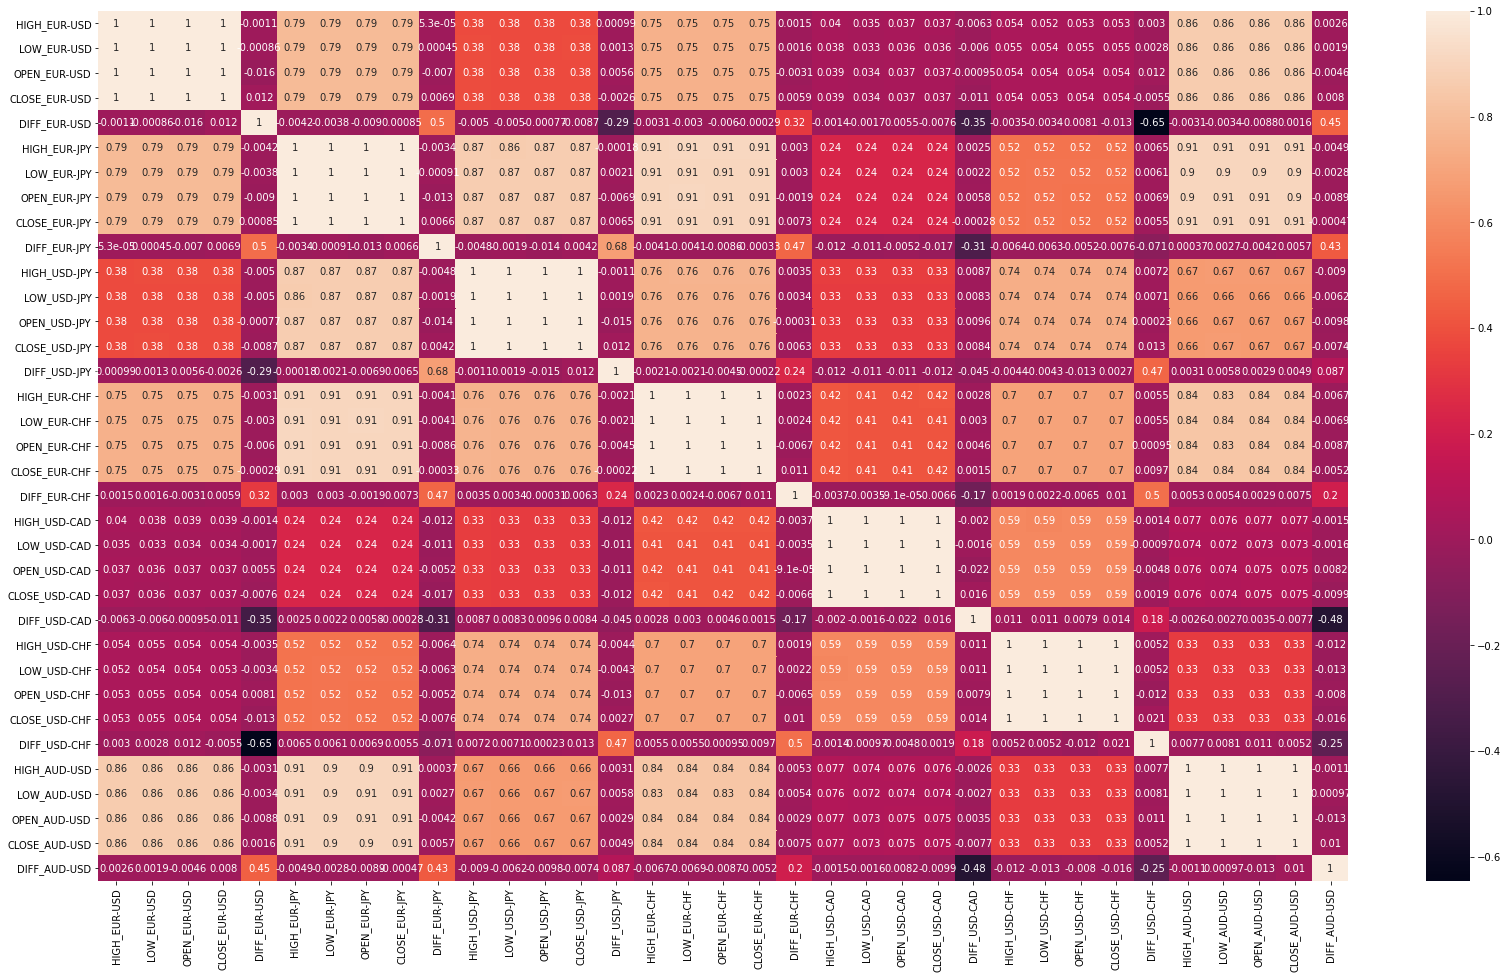

In [15]:
plt.figure(figsize=(28,16))
correlation = forex_pairs.corr()
sns.heatmap(correlation, annot=True)

### Correlation between diffs

In [16]:
df = forex_pairs[['DIFF_EUR-USD','DIFF_EUR-JPY','DIFF_USD-JPY','DIFF_EUR-CHF','DIFF_USD-CHF','DIFF_USD-CAD','DIFF_AUD-USD',]]

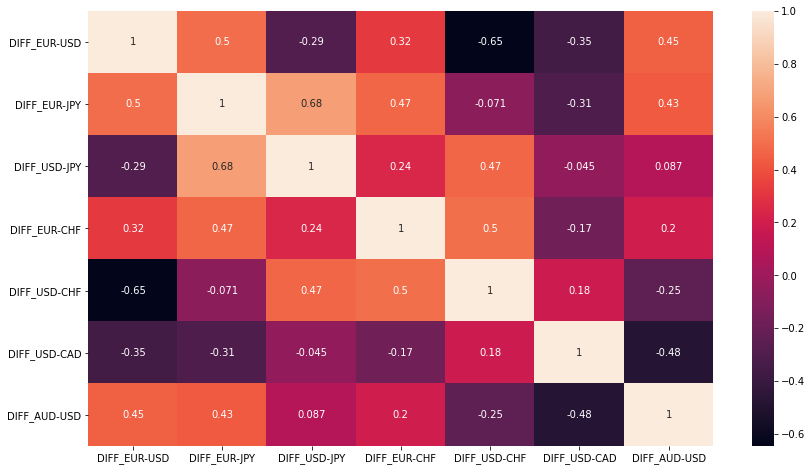

In [17]:
plt.figure(figsize=(14,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True)